In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import folium 
import seaborn as sns 
plt.style.use('seaborn')
import plotly.express as px
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

In [7]:
df_house = pd.read_csv('kc_house_data.csv')

In [8]:
# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [9]:
#heat map based on lat, long and price
from folium.plugins import HeatMap
base_map = generateBaseMap()
HeatMap(data=df_house[['lat', 'long', 'price']].groupby(['lat', 'long']).sum().reset_index().values.tolist(), radius=8, max_zoom=15).add_to(base_map)
       
base_map

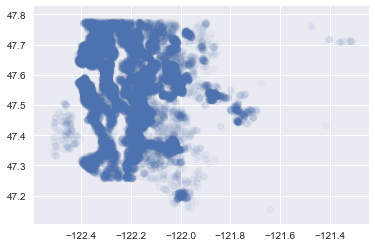

In [10]:

plt.scatter(df_house['long'],df_house['lat'],alpha=0.05,cmap="flag")
plt.show()

In [11]:
df_house_1 = df_house[df_house.price < 2000000]

In [19]:

import plotly.express as px
fig = px.scatter(df_house_1, x='long', y='lat', color="price")
fig.show()

In [13]:
df_house_2 = df_house[df_house.price > 2000000]

In [14]:
import plotly.express as px
fig = px.scatter(df_house_2, x='long', y='lat', color="price")
fig.show()

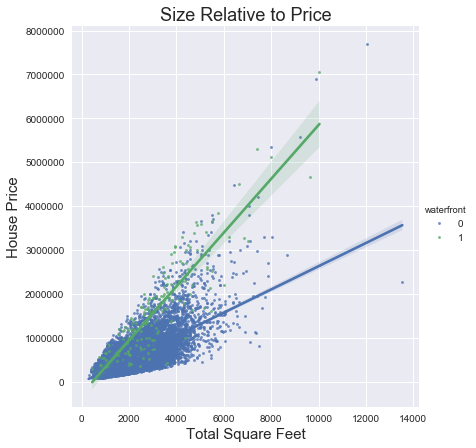

In [15]:
sns.lmplot(x='sqft_living', y='price', data=df_house, scatter_kws={'s':8}, hue='waterfront', height=6)

plt.title('Size Relative to Price', size=18)
plt.ylabel('House Price', size=15)
plt.xlabel('Total Square Feet', size=15)


plt.show()

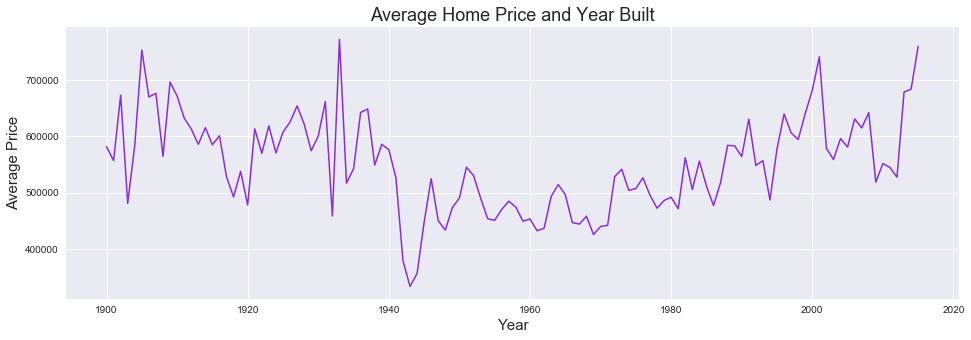

In [16]:
plt.figure(figsize=(16,5))

sns.lineplot(x='yr_built', y='price', data=df_house,linewidth=1.5, color='blueviolet', ci=None)

plt.title('Average Home Price and Year Built', size=18)
plt.ylabel('Average Price', size=15)
plt.xlabel('Year', size=15)

plt.show()

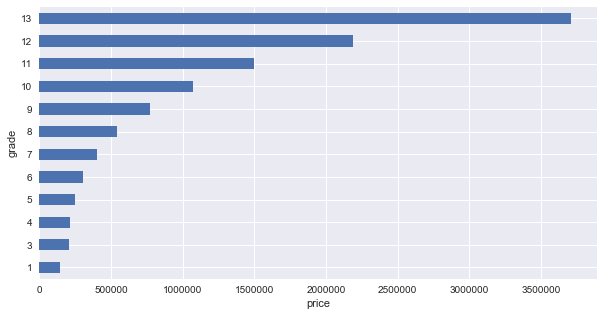

In [17]:
groups = df_house.groupby(['grade'])['price'].mean()
plt.figure(figsize=(10, 5))
plt.xlabel('price')
groups.plot.barh()

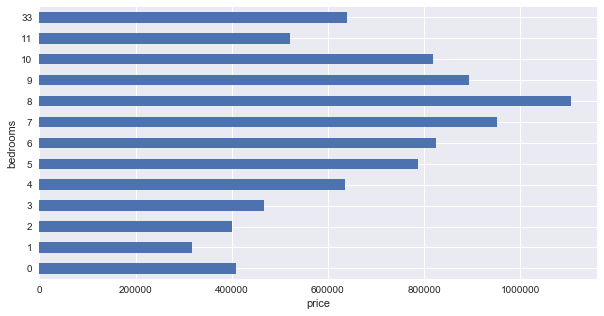

In [18]:
groups = df_house.groupby(['bedrooms'])['price'].mean()
plt.figure(figsize=(10, 5))
plt.xlabel('price')
groups.plot.barh()